## Importing Libraries

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import roc_curve, auc

## Loading the Dataset

In [17]:
#Dataset is being loaded
spam_dataset = pd.read_csv("spambase.csv")

# Adding the names for the column
spam_dataset.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'target_value']

# For visibility purpose, first 5 rows are being displayed
spam_dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target_value
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [18]:
#Finding the shape of the dataset
spam_dataset.shape

(4600, 58)

**This means that there are 4600 data tuples/rows and 58 data columns in this dataset**

## Data Cleaning

In [19]:
# Removing duplicate data rows from the dataset
spam_dataset = spam_dataset.drop_duplicates()
spam_dataset.shape

(4209, 58)

**This means that there were duplicate data rows in the dataset as it got decreased to 4209 rows from 4600 rows**

In [20]:
# Getting missing data values in the columns per column
missing_data_vals = spam_dataset.isnull().sum()
missing_data_vals

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

**From the above output, we can see that there are no missing values available in the dataset**

## Spam Dataset Visualization

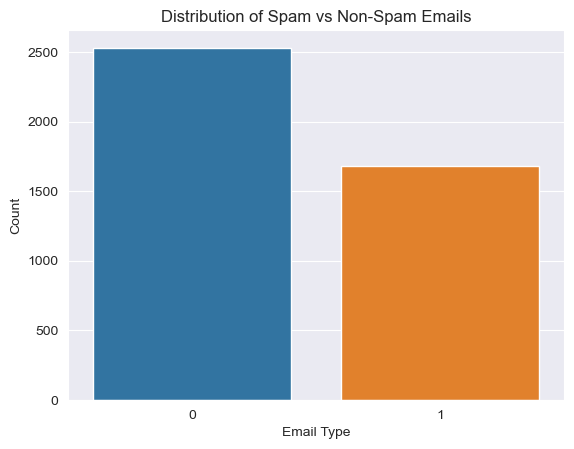

In [21]:
sns.countplot(x='target_value', data=spam_dataset)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

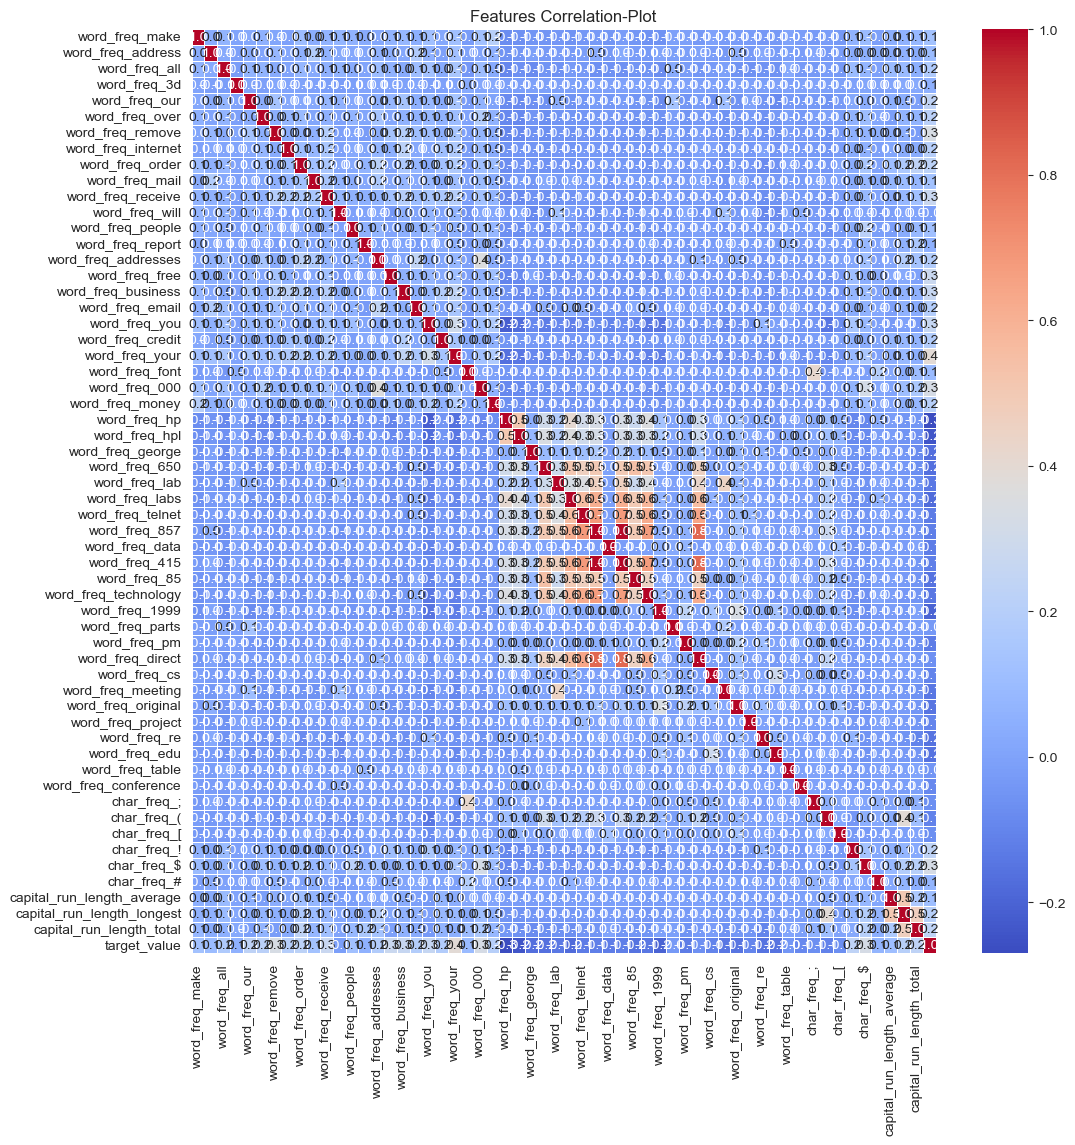

In [70]:
# Compute the correlation matrix
corr = spam_dataset.corr()

# Create a heatmap of the correlation matrix
f, ax = plt.subplots(figsize=[12,12])
plt.title('Features Correlation-Plot')
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

In [23]:
# Creating a dataset with all the training data except the target value column
X = spam_dataset.drop(columns=['target_value'])
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [24]:
# Getting and separating the target values
Y = spam_dataset['target_value'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Splitting the raw dataset

In [25]:
# Split dataset into training (70%) and testing (30%) - using the raw data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 0)

In [26]:
# Create KNN Classifier model for k = 5
k = 5
KNN_classification = KNeighborsClassifier(n_neighbors = k)

# Train the model using the training sets
KNN_classification.fit(X_train_raw,Y_train )

#Getting the training data accuracy score
print(KNN_classification.score(X_train_raw, Y_train))

#Getting the test data accuracy score
print(KNN_classification.score(X_test_raw, Y_test))

0.8557365919891378
0.8012668250197942


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

**We guarantee that each feature has a comparable range and variance by scaling them, which makes it easier for the algorithm to recognize the deeper data patterns.**

## Scaled Dataset Splitting

In [28]:
# Split dataset into training (70%) and testing (30%) - using the scaled data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size = 0.7, random_state = 0)


In [43]:
import numpy as np

error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,Y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=Y_test))
error_rate

[0.10530482977038796,
 0.13539192399049882,
 0.1021377672209026,
 0.11163895486935867,
 0.0997624703087886,
 0.11559778305621536,
 0.10688836104513064,
 0.11163895486935867,
 0.10768012668250197,
 0.11243072050673,
 0.10530482977038796,
 0.11163895486935867,
 0.110055423594616,
 0.11480601741884403,
 0.11163895486935867,
 0.11718131433095803,
 0.11401425178147269,
 0.11401425178147269,
 0.11163895486935867,
 0.11718131433095803,
 0.11163895486935867,
 0.1187648456057007,
 0.110055423594616,
 0.1187648456057007,
 0.11163895486935867,
 0.1163895486935867,
 0.11480601741884403,
 0.11718131433095803,
 0.11480601741884403,
 0.12114014251781473]

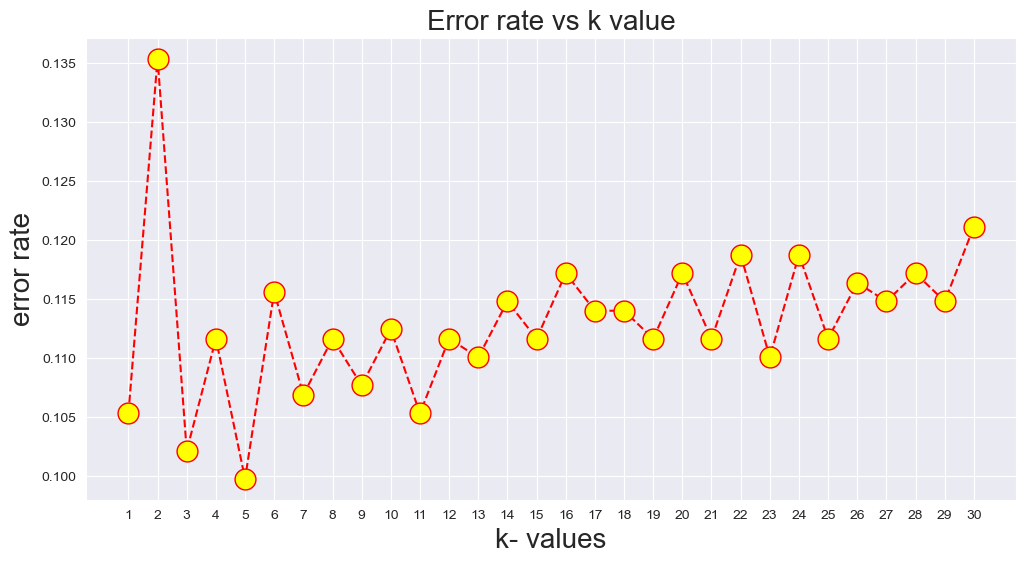

In [45]:
#plotting the error rate vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="yellow",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

## K-Nearest Neighbor(KNN) Classification Model

In [47]:
# Create KNN Classifier model for k = 5
k = 5
KNN_classification = KNeighborsClassifier(n_neighbors = k)

# Train the model using the training sets
KNN_classification.fit(X_train,Y_train )

#Getting the training data accuracy score
print('Training accuracy: ',KNN_classification.score(X_train, Y_train))

#Getting the test data accuracy score
print('Testing accuracy: ',KNN_classification.score(X_test, Y_test))

Training accuracy:  0.9300746775288526
Testing accuracy:  0.9002375296912114


## Dataset Evaluation - Train Dataset

In [48]:
# Predict the response for train dataset
train_prediction = KNN_classification.predict(X_train)

# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = train_prediction)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = train_prediction))

          Not-spam  Spam
Not-spam      1716    78
Spam           128  1024
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1794
           1       0.93      0.89      0.91      1152

    accuracy                           0.93      2946
   macro avg       0.93      0.92      0.93      2946
weighted avg       0.93      0.93      0.93      2946



## Dataset Validation  -  Test Dataset

In [49]:
# Predict the response for test dataset
test_prediction = KNN_classification.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = test_prediction)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = test_prediction))

          Not-spam  Spam
Not-spam       693    44
Spam            82   444
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       737
           1       0.91      0.84      0.88       526

    accuracy                           0.90      1263
   macro avg       0.90      0.89      0.90      1263
weighted avg       0.90      0.90      0.90      1263



## Visualization of ROC Curve and Calculating AUC - For Scaled Data


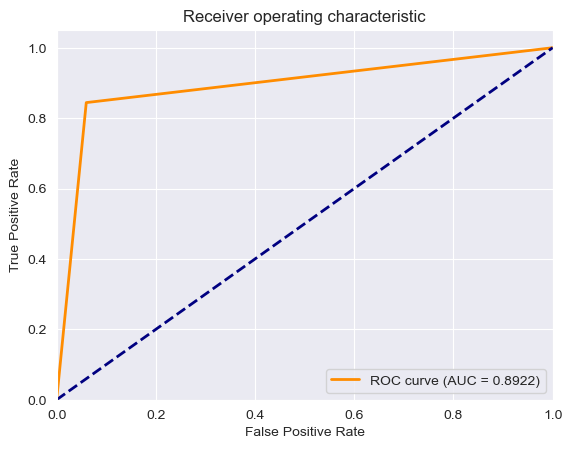

AUC: 0.8922


In [50]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, test_prediction)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.4f"% roc_auc)

## Applying PCA to the scaled dataset

In [51]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(4209, 49)

**This means that the features/columns have been decreased to 49**

In [52]:
pca.explained_variance_ratio_

array([0.10899513, 0.05583094, 0.0353128 , 0.02858045, 0.0271153 ,
       0.02575975, 0.02483614, 0.02398193, 0.02270325, 0.02183887,
       0.02167963, 0.02015995, 0.02006717, 0.01935537, 0.01924267,
       0.01866808, 0.01848522, 0.01796674, 0.0178274 , 0.01756145,
       0.01717349, 0.01698023, 0.01672036, 0.01657472, 0.01645046,
       0.01610422, 0.01585499, 0.01571016, 0.0153264 , 0.01517569,
       0.01456768, 0.01435856, 0.01421106, 0.01406908, 0.01383434,
       0.01333399, 0.01329598, 0.01301827, 0.01274202, 0.01232527,
       0.01195466, 0.0117737 , 0.01120298, 0.01098196, 0.01036702,
       0.01030622, 0.00936144, 0.00876401, 0.00816524])

**This array indicates  the variance proportion of the 49 principal components in descending order**

In [53]:
pca.explained_variance_ratio_.sum()

0.9566723905184702

**This code has returned the sum of the explained variance proportion ratios of the principal components, and it indicates that around 95% variance of the original data is included and captured**

In [54]:
pca.n_components_

49

**Indicates the number of features now available in the dataset to model training and testing**

In [37]:
# Split dataset into training (70%) and testing (30%) - using the PCA scaled data
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, train_size = 0.7, random_state = 0)

In [55]:
# Train the model using the training sets
KNN_classification.fit(X_train_pca,Y_train )

#Getting the training data accuracy score for the PCA implemented data
print('Training accuracy: ',KNN_classification.score(X_train_pca, Y_train))

#Getting the test data accuracy score for the PCA implemented data
print('Testing accuracy: ',KNN_classification.score(X_test_pca, Y_test))

Training accuracy:  0.9290563475899525
Testing accuracy:  0.9041963578780681


## Reconstruction Loss Calculation

In [60]:
from sklearn.metrics import mean_squared_error

X_reconstructed = pca.inverse_transform(X_pca)
loss = mean_squared_error(X_scaled,X_reconstructed)
print(loss)

0.04332760948152975


## Dataset Evaluation -  Training Data

In [57]:
# Predict the response for train dataset
train_prediction_pca = KNN_classification.predict(X_train_pca)

# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = train_prediction_pca)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = train_prediction_pca))

          Not-spam  Spam
Not-spam      1712    82
Spam           127  1025
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1794
           1       0.93      0.89      0.91      1152

    accuracy                           0.93      2946
   macro avg       0.93      0.92      0.92      2946
weighted avg       0.93      0.93      0.93      2946



## Dataset Validation -  Test data

In [58]:
# Predict the response for test dataset
test_prediction_pca = KNN_classification.predict(X_test_pca)

# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = test_prediction_pca)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = test_prediction_pca))

          Not-spam  Spam
Not-spam       688    49
Spam            72   454
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       737
           1       0.90      0.86      0.88       526

    accuracy                           0.90      1263
   macro avg       0.90      0.90      0.90      1263
weighted avg       0.90      0.90      0.90      1263



## Visualization of ROC Curve and Calculating AUC - For PCA applied Scaled Data

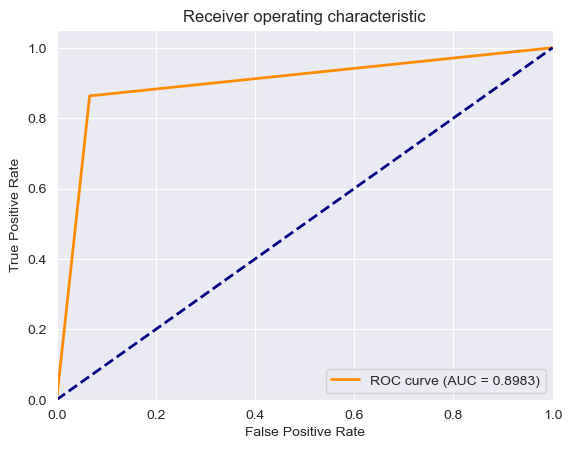

AUC: 0.8983


In [59]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, test_prediction_pca)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.4f"% roc_auc)